In [1]:
import pandas as pd
df = pd.read_excel('Hasil Tes SBK LPDP Gelombang I - 2021 (Responses).xlsx')
df

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,2021-06-24 15:54:14.730,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,2021-06-24 15:54:22.247,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,2021-06-24 15:54:54.140,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,2021-06-24 15:56:06.238,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,2021-06-24 15:56:28.395,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...,...
466,2022-04-22 12:00:26.598,Reguler,S3,Dalam negeri,TRP,Tidak,Tidak,18,9,5,UI
467,2022-04-23 09:19:55.272,Reguler,S2,Luar Negeri,COM,Tidak,Tidak,18,10,5,NaN
468,2022-04-23 13:02:20.815,Targeted,S3,Luar Negeri,Edu,Tidak,Tidak,20,11,3,Monash university
469,2022-04-24 04:06:51.954,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,17,10,7,UI


In [2]:
df.isna().sum()

Timestamp                                                                                0
Jenis Beasiswa                                                                           0
Tingkat Pendidikan yang Dituju                                                           0
Negara Tujuan Kuliah                                                                     0
Bidang Studi yang dipilih saat mendaftar                                                 0
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                   0
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?     0
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           0
Jumlah Jawaban Benar pada Tes Kuantitatif                                                0
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          0
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               91

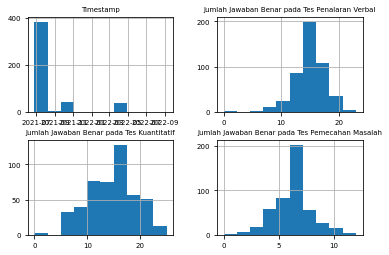

In [3]:
 import matplotlib.pyplot as plt
fig = df.hist(xlabelsize=7, ylabelsize=7)
[x.title.set_size(7) for x in fig.ravel()]
# show the plot
plt.show()

# 1. Eksplorasi setiap kolom fitur dan pilihlah transformasi yang sesuai untuk fitur tersebut.

In [4]:
df.dtypes

Timestamp                                                                               datetime64[ns]
Jenis Beasiswa                                                                                  object
Tingkat Pendidikan yang Dituju                                                                  object
Negara Tujuan Kuliah                                                                            object
Bidang Studi yang dipilih saat mendaftar                                                        object
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                          object
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?            object
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                                   int64
Jumlah Jawaban Benar pada Tes Kuantitatif                                                        int64
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                          

In [5]:
df.nunique()

Timestamp                                                                               471
Jenis Beasiswa                                                                            3
Tingkat Pendidikan yang Dituju                                                            2
Negara Tujuan Kuliah                                                                      2
Bidang Studi yang dipilih saat mendaftar                                                 89
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                    2
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?      2
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           19
Jumlah Jawaban Benar pada Tes Kuantitatif                                                23
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          12
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                       

In [6]:
df_trans = df.copy()
df_trans.shape

(471, 11)

## Buang baris yang memiliki integer dalam colom kategori

In [7]:
cat = df_trans[['Jenis Beasiswa ','Tingkat Pendidikan yang Dituju','Negara Tujuan Kuliah','Bidang Studi yang dipilih saat mendaftar','Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP ','[optional] Kampus/universitas tujuan saat ini (pilihan 1)','Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']]
for i in cat:
    k = 0
    for j in cat[i]:
        k+=1
        if isinstance(j, int):
            print(cat.iloc[k-1])
            cat.drop(k-1,inplace=True)
            print(cat.iloc[k-1])
            
cat.shape

Jenis Beasiswa                                                                               Reguler
Tingkat Pendidikan yang Dituju                                                                    S2
Negara Tujuan Kuliah                                                                    Dalam negeri
Bidang Studi yang dipilih saat mendaftar                                                         718
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                         Tidak
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                                        UGM
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?           Tidak
Name: 426, dtype: object
Jenis Beasiswa                                                                               Reguler
Tingkat Pendidikan yang Dituju                                                                    S2
Negara Tujuan Kuliah                                              

C:\Users\jmspa\AppData\Local\Temp\ipykernel_9964\3348108378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat.drop(k-1,inplace=True)


(470, 7)

## Melakukan binary encoder pada data kategorial yang memiliki nilai unique >2

In [8]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=cat[['Jenis Beasiswa ','Bidang Studi yang dipilih saat mendaftar','[optional] Kampus/universitas tujuan saat ini (pilihan 1)']])


df_encoded = encoder.fit_transform(df_trans)
print(df_encoded.columns)

Index(['Timestamp', 'Jenis Beasiswa _0', 'Jenis Beasiswa _1',
       'Tingkat Pendidikan yang Dituju', 'Negara Tujuan Kuliah',
       'Bidang Studi yang dipilih saat mendaftar_0',
       'Bidang Studi yang dipilih saat mendaftar_1',
       'Bidang Studi yang dipilih saat mendaftar_2',
       'Bidang Studi yang dipilih saat mendaftar_3',
       'Bidang Studi yang dipilih saat mendaftar_4',
       'Bidang Studi yang dipilih saat mendaftar_5',
       'Bidang Studi yang dipilih saat mendaftar_6',
       'Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP ',
       'Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?',
       'Jumlah Jawaban Benar pada Tes Penalaran Verbal',
       'Jumlah Jawaban Benar pada Tes Kuantitatif',
       'Jumlah Jawaban Benar pada Tes Pemecahan Masalah',
       '[optional] Kampus/universitas tujuan saat ini (pilihan 1)_0',
       '[optional] Kampus/universitas tujuan saat ini (pilihan 1)_1',
       '[optional] Kampus/universi

## Melakukan ordinal encoder pada data kategorial yang memiliki nilai unique = 2, agar mendapatkan boolean value (0 dan 1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_encoded[['Tingkat Pendidikan yang Dituju','Negara Tujuan Kuliah','Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP ','Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']] = encoder.fit_transform(df_encoded[['Tingkat Pendidikan yang Dituju','Negara Tujuan Kuliah','Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP ','Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']])
df_encoded.shape

(471, 25)

In [10]:
pd.options.display.max_columns = None
df_encoded

,Timestamp,Jenis Beasiswa _0,Jenis Beasiswa _1,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar_0,Bidang Studi yang dipilih saat mendaftar_1,Bidang Studi yang dipilih saat mendaftar_2,Bidang Studi yang dipilih saat mendaftar_3,Bidang Studi yang dipilih saat mendaftar_4,Bidang Studi yang dipilih saat mendaftar_5,Bidang Studi yang dipilih saat mendaftar_6,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_0,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_1,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_2,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_3,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_4,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_5,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_6,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_7
0,2021-06-24 15:54:14.730,0,1,0.0,0.0,0,0,0,0,0,0,1,0.0,1.0,10,12,6,0,0,0,0,0,0,0,1
1,2021-06-24 15:54:22.247,1,0,0.0,1.0,0,0,0,0,0,1,0,1.0,1.0,17,22,8,0,0,0,0,0,0,1,0
2,2021-06-24 15:54:54.140,0,1,0.0,1.0,0,0,0,0,0,1,1,1.0,1.0,16,18,7,0,0,0,0,0,0,1,1
3,2021-06-24 15:56:06.238,1,0,0.0,0.0,0,0,0,0,1,0,0,0.0,0.0,15,12,4,0,0,0,0,0,1,0,0
4,2021-06-24 15:56:28.395,1,1,0.0,1.0,0,0,0,0,1,0,0,0.0,1.0,16,9,7,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2022-04-22 12:00:26.598,1,0,1.0,0.0,0,0,0,0,0,0,1,0.0,0.0,18,9,5,0,0,0,1,1,1,0,1
467,2022-04-23 09:19:55.272,1,0,0.0,1.0,0,0,1,0,1,1,1,0.0,0.0,18,10,5,0,0,0,0,1,0,0,0
468,2022-04-23 13:02:20.815,0,1,1.0,1.0,1,0,1,1,0,0,1,0.0,0.0,20,11,3,1,0,1,1,0,1,1,1
469,2022-04-24 04:06:51.954,1,0,0.0,0.0,0,0,0,0,0,0,1,0.0,0.0,17,10,7,0,0,0,1,1,1,0,1


## Membuat data numerik menjadi lebih gaussian dan terskalakan menggunakan metode yeo-johnson

In [11]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson',standardize=True)

df_encoded[['Jumlah Jawaban Benar pada Tes Penalaran Verbal','Jumlah Jawaban Benar pada Tes Kuantitatif','Jumlah Jawaban Benar pada Tes Pemecahan Masalah']] = power.fit_transform(df_encoded[['Jumlah Jawaban Benar pada Tes Penalaran Verbal','Jumlah Jawaban Benar pada Tes Kuantitatif','Jumlah Jawaban Benar pada Tes Pemecahan Masalah']])
df_encoded

,Timestamp,Jenis Beasiswa _0,Jenis Beasiswa _1,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar_0,Bidang Studi yang dipilih saat mendaftar_1,Bidang Studi yang dipilih saat mendaftar_2,Bidang Studi yang dipilih saat mendaftar_3,Bidang Studi yang dipilih saat mendaftar_4,Bidang Studi yang dipilih saat mendaftar_5,Bidang Studi yang dipilih saat mendaftar_6,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_0,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_1,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_2,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_3,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_4,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_5,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_6,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_7
0,2021-06-24 15:54:14.730,0,1,0.0,0.0,0,0,0,0,0,0,1,0.0,1.0,-1.784775,-0.582942,-0.079132,0,0,0,0,0,0,0,1
1,2021-06-24 15:54:22.247,1,0,0.0,1.0,0,0,0,0,0,1,0,1.0,1.0,0.673821,1.760870,0.999869,0,0,0,0,0,0,1,0
2,2021-06-24 15:54:54.140,0,1,0.0,1.0,0,0,0,0,0,1,1,1.0,1.0,0.270849,0.806362,0.464543,0,0,0,0,0,0,1,1
3,2021-06-24 15:56:06.238,1,0,0.0,0.0,0,0,0,0,1,0,0,0.0,0.0,-0.115396,-0.582942,-1.197464,0,0,0,0,0,1,0,0
4,2021-06-24 15:56:28.395,1,1,0.0,1.0,0,0,0,0,1,0,0,0.0,1.0,0.270849,-1.253207,0.464543,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2022-04-22 12:00:26.598,1,0,1.0,0.0,0,0,0,0,0,0,1,0.0,0.0,1.093255,-1.253207,-0.632517,0,0,0,1,1,1,0,1
467,2022-04-23 09:19:55.272,1,0,0.0,1.0,0,0,1,0,1,1,1,0.0,0.0,1.093255,-1.031939,-0.632517,0,0,0,0,1,0,0,0
468,2022-04-23 13:02:20.815,0,1,1.0,1.0,1,0,1,1,0,0,1,0.0,0.0,1.980537,-0.808462,-1.776638,1,0,1,1,0,1,1,1
469,2022-04-24 04:06:51.954,1,0,0.0,0.0,0,0,0,0,0,0,1,0.0,0.0,0.673821,-1.031939,0.464543,0,0,0,1,1,1,0,1


In [12]:
df_encoded.drop('Timestamp',axis=1,inplace=True)

## Membuat model klasifikasi dengan MLP

In [13]:
X_encoded,y_encoded = df_encoded.loc[:, df_encoded.columns != 'Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?'],df_encoded['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']
X_encoded

,Jenis Beasiswa _0,Jenis Beasiswa _1,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar_0,Bidang Studi yang dipilih saat mendaftar_1,Bidang Studi yang dipilih saat mendaftar_2,Bidang Studi yang dipilih saat mendaftar_3,Bidang Studi yang dipilih saat mendaftar_4,Bidang Studi yang dipilih saat mendaftar_5,Bidang Studi yang dipilih saat mendaftar_6,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_0,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_1,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_2,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_3,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_4,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_5,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_6,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_7
0,0,1,0.0,0.0,0,0,0,0,0,0,1,0.0,-1.784775,-0.582942,-0.079132,0,0,0,0,0,0,0,1
1,1,0,0.0,1.0,0,0,0,0,0,1,0,1.0,0.673821,1.760870,0.999869,0,0,0,0,0,0,1,0
2,0,1,0.0,1.0,0,0,0,0,0,1,1,1.0,0.270849,0.806362,0.464543,0,0,0,0,0,0,1,1
3,1,0,0.0,0.0,0,0,0,0,1,0,0,0.0,-0.115396,-0.582942,-1.197464,0,0,0,0,0,1,0,0
4,1,1,0.0,1.0,0,0,0,0,1,0,0,0.0,0.270849,-1.253207,0.464543,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1,0,1.0,0.0,0,0,0,0,0,0,1,0.0,1.093255,-1.253207,-0.632517,0,0,0,1,1,1,0,1
467,1,0,0.0,1.0,0,0,1,0,1,1,1,0.0,1.093255,-1.031939,-0.632517,0,0,0,0,1,0,0,0
468,0,1,1.0,1.0,1,0,1,1,0,0,1,0.0,1.980537,-0.808462,-1.776638,1,0,1,1,0,1,1,1
469,1,0,0.0,0.0,0,0,0,0,0,0,1,0.0,0.673821,-1.031939,0.464543,0,0,0,1,1,1,0,1


In [14]:
from sklearn.model_selection import train_test_split
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size = 0.25,random_state=0)

In [15]:
X_train_encoded

,Jenis Beasiswa _0,Jenis Beasiswa _1,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar_0,Bidang Studi yang dipilih saat mendaftar_1,Bidang Studi yang dipilih saat mendaftar_2,Bidang Studi yang dipilih saat mendaftar_3,Bidang Studi yang dipilih saat mendaftar_4,Bidang Studi yang dipilih saat mendaftar_5,Bidang Studi yang dipilih saat mendaftar_6,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_0,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_1,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_2,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_3,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_4,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_5,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_6,[optional] Kampus/universitas tujuan saat ini (pilihan 1)_7
394,1,0,0.0,1.0,0,0,0,1,1,1,1,0.0,1.093255,-1.688289,1.527885,0,0,0,0,1,0,0,0
284,1,0,0.0,1.0,0,1,0,0,1,0,0,0.0,1.093255,1.043099,-0.632517,0,0,1,0,0,0,1,0
8,1,0,0.0,1.0,0,0,0,0,1,1,1,1.0,-0.836535,0.337024,0.464543,0,0,0,0,1,0,0,1
369,1,0,0.0,1.0,0,0,0,1,0,0,0,1.0,-0.115396,-1.472069,-0.079132,1,0,0,1,1,1,1,0
5,0,1,0.0,1.0,0,0,0,0,1,0,1,1.0,0.673821,-0.808462,-1.197464,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,0.0,1.0,0,1,1,0,0,1,0,0.0,1.093255,0.570981,2.049412,1,0,0,0,1,1,1,0
192,1,0,0.0,1.0,0,0,1,0,1,1,1,0.0,-0.836535,-1.688289,3.075521,0,0,0,1,1,0,1,1
117,1,0,0.0,0.0,0,0,0,0,0,0,1,1.0,0.673821,1.520406,0.464543,0,0,0,1,1,1,0,1
47,1,1,0.0,0.0,0,0,0,0,0,0,1,0.0,0.270849,0.337024,-1.776638,0,0,0,0,0,1,0,0


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
clf.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = clf.predict(X_test_encoded)
accuracy_score(y_test_encoded, y_pred_encoded)

0.8389830508474576

# 2. Lakukanlah transformasi data campuran untuk semua kolom yang dirasa perlu ditransformasi dengan menggunakan ColumnTransformer (bisa menggunakan berbagai cara yang sudah diajarkan) lalu ubah hasilnya menuju file baru dengan menggunakan proses ETL. 

In [17]:
df_trans = df.copy()
df_trans

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,2021-06-24 15:54:14.730,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,2021-06-24 15:54:22.247,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,2021-06-24 15:54:54.140,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,2021-06-24 15:56:06.238,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,2021-06-24 15:56:28.395,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...,...
466,2022-04-22 12:00:26.598,Reguler,S3,Dalam negeri,TRP,Tidak,Tidak,18,9,5,UI
467,2022-04-23 09:19:55.272,Reguler,S2,Luar Negeri,COM,Tidak,Tidak,18,10,5,NaN
468,2022-04-23 13:02:20.815,Targeted,S3,Luar Negeri,Edu,Tidak,Tidak,20,11,3,Monash university
469,2022-04-24 04:06:51.954,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,17,10,7,UI


## Buang baris yang memiliki integer dalam colom kategori

In [18]:
cat = df_trans[['Jenis Beasiswa ','Tingkat Pendidikan yang Dituju','Negara Tujuan Kuliah','Bidang Studi yang dipilih saat mendaftar','Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP ','[optional] Kampus/universitas tujuan saat ini (pilihan 1)','Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']]
for i in cat:
    k = 0
    for j in cat[i]:
        k+=1
        if isinstance(j, int):
            print(cat.iloc[k-1])
            cat.drop(k-1,inplace=True)
            print(cat.iloc[k-1])
            
cat.shape

Jenis Beasiswa                                                                               Reguler
Tingkat Pendidikan yang Dituju                                                                    S2
Negara Tujuan Kuliah                                                                    Dalam negeri
Bidang Studi yang dipilih saat mendaftar                                                         718
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                         Tidak
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                                        UGM
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?           Tidak
Name: 426, dtype: object
Jenis Beasiswa                                                                               Reguler
Tingkat Pendidikan yang Dituju                                                                    S2
Negara Tujuan Kuliah                                              

C:\Users\jmspa\AppData\Local\Temp\ipykernel_9964\3348108378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat.drop(k-1,inplace=True)


(470, 7)

In [19]:
df_trans.dtypes

Timestamp                                                                               datetime64[ns]
Jenis Beasiswa                                                                                  object
Tingkat Pendidikan yang Dituju                                                                  object
Negara Tujuan Kuliah                                                                            object
Bidang Studi yang dipilih saat mendaftar                                                        object
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                          object
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?            object
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                                   int64
Jumlah Jawaban Benar pada Tes Kuantitatif                                                        int64
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                          

In [20]:
df_trans.nunique()

Timestamp                                                                               471
Jenis Beasiswa                                                                            3
Tingkat Pendidikan yang Dituju                                                            2
Negara Tujuan Kuliah                                                                      2
Bidang Studi yang dipilih saat mendaftar                                                 89
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                    2
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?      2
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           19
Jumlah Jawaban Benar pada Tes Kuantitatif                                                23
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          12
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                       

In [21]:
from sklearn.compose import ColumnTransformer
manycat = [1,4,-1]
cat = [2,3,5,6]
num = [7,8,9]
cols = ['Jenis Beasiswa','Bidang Studi yang dipilih saat mendaftar','Kampus/universitas tujuan saat ini','Tingkat Pendidikan yang Dituju','Negara Tujuan Kuliah','Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP','Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?','Jumlah Jawaban Benar pada Tes Penalaran Verbal','Jumlah Jawaban Benar pada Tes Kuantitatif','Jumlah Jawaban Benar pada Tes Pemecahan Masalah']
trans = ColumnTransformer(transformers=[('manycat', ce.BinaryEncoder(),manycat),('num',PowerTransformer(),num),('cat',OrdinalEncoder(),cat)])
df_trans = pd.DataFrame(trans.fit_transform(df_trans))
df_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.784775,-0.582942,-0.079132,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.673821,1.760870,0.999869,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.270849,0.806362,0.464543,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.115396,-0.582942,-1.197464,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.270849,-1.253207,0.464543,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.093255,-1.253207,-0.632517,1.0,0.0,0.0,0.0
467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.093255,-1.031939,-0.632517,0.0,1.0,0.0,0.0
468,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.980537,-0.808462,-1.776638,1.0,1.0,0.0,0.0
469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.673821,-1.031939,0.464543,0.0,0.0,0.0,0.0


In [23]:
X_trans, y_trans = df_trans.loc[:, df_trans.columns != 6],df_trans[6]
print(X_trans.shape, y_trans.shape)

(471, 23) (471,)


In [24]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size = 0.25,random_state=0)
clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
clf.fit(X_train_trans, y_train_trans)
y_pred_trans = clf.predict(X_test_trans)
accuracy_score(y_test_trans, y_pred_trans)

0.6864406779661016

## Proses ETL

In [25]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))
pickle.dump(trans, open('trans.pkl', 'wb'))
pickle.dump(df_trans, open('df_trans.xlsx', 'wb'))

# 3. Tanpa membuka raw data, gunakan file baru tersebut untuk memprediksi kelulusan seorang calon peserta beasiswa LPDP (boleh memakai model apapun)

In [26]:
new_df = pickle.load(open('df_trans.xlsx', 'rb'))
model = pickle.load(open('df_trans.xlsx', 'rb'))

In [27]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.784775,-0.582942,-0.079132,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.673821,1.760870,0.999869,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.270849,0.806362,0.464543,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.115396,-0.582942,-1.197464,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.270849,-1.253207,0.464543,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.093255,-1.253207,-0.632517,1.0,0.0,0.0,0.0
467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.093255,-1.031939,-0.632517,0.0,1.0,0.0,0.0
468,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.980537,-0.808462,-1.776638,1.0,1.0,0.0,0.0
469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.673821,-1.031939,0.464543,0.0,0.0,0.0,0.0


In [28]:
X, y = df_trans.loc[:, df_trans.columns != 6],df_trans[6]
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
466    0.0
467    1.0
468    0.0
469    0.0
470    1.0
Name: 6, Length: 471, dtype: float64

In [29]:
y_pred = clf.predict(X)
acc_trans = accuracy_score(y, y_pred)
acc_trans

0.7940552016985138

# 4. Bandingkan hasilnya dengan hasil tanpa menggunakan transformasi

Karena tanpa menggunakan transformasi maka fitur yang dapat diambil adalah fitur-fitur yang memiliki data numerik

In [30]:
df = pd.read_excel('Hasil Tes SBK LPDP Gelombang I - 2021 (Responses).xlsx')
num_X = df[['Jumlah Jawaban Benar pada Tes Penalaran Verbal','Jumlah Jawaban Benar pada Tes Kuantitatif','Jumlah Jawaban Benar pada Tes Pemecahan Masalah']]
y = df['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']
num_X

,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah
0,10,12,6
1,17,22,8
2,16,18,7
3,15,12,4
4,16,9,7
...,...,...,...
466,18,9,5
467,18,10,5
468,20,11,3
469,17,10,7


In [31]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(num_X, y, test_size = 0.25,random_state=0)

In [32]:
model = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
model.fit(X_train_num, y_train_num)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [33]:
y_pred = model.predict(X_test_num)
acc_non_trans = accuracy_score(y_test_num, y_pred)
acc_non_trans

0.7203389830508474